# Load libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
import numpy as np

from sklearn.decomposition import PCA
from scipy.ndimage.filters import gaussian_filter
import csv

/var/folders/jn/x2x9w_8n77b_g5cnyyfbzc9w0000gp/T/ipykernel_13164/2835711351.py:7: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


# Define Color maps

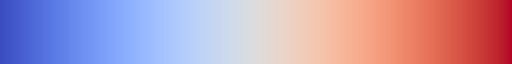

In [2]:
scw = []

with open('../../data/processed_data/common/smooth-cool-warm-table-float-1024.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for i, rows in enumerate(reader):
        if i > 0:
            r = [float(i) for i in rows]
            scw.append(tuple(r[1:]))
            scw.append(r[0])
            
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = list(seq) + [(None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return colors.LinearSegmentedColormap('CustomMap', cdict)

c = colors.ColorConverter().to_rgb
rvb = make_colormap(scw)
rvb

# Color palette

In [3]:
blue = [0.229999504, 0.298998934, 0.754000139]
red = [0.706000136, 0.015991824, 0.150000072]
purple = [0.4588, 0.4392, 0.7020]
mint = [0.1059, 0.6196, 0.4667]

# Extended Data Figure 4m

In [4]:
norm = colors.Normalize(vmin=-3.5, vmax=3.5)
data = np.load(
    '../../data/processed_data/extended_data_figure_4/T176_2018_05_15_randomseed1.npz'
)

x = data['x']
y = data['y']
u = data['u']
v = data['v']
energy = data['energy']
x_ = data['x_']
y_ = data['y_']
u_ = data['u_']
v_ = data['v_']
energy_ = data['energy_']
u_left = data['u_left']
v_left = data['v_left']
energy_left = data['energy_left']
u_right = data['u_right']
v_right = data['v_right']
energy_right = data['energy_right']   
u_left_ = data['u_left_']
v_left_ = data['v_left_']
energy_left_ = data['energy_left_']
u_right_ = data['u_right_']
v_right_ = data['v_right_']
energy_right_ = data['energy_right_']   
p_lc = data['p_lc']
p_rc = data['p_rc']
p_lc_ = data['p_lc_']
p_rc_ = data['p_rc_']
z_pc_ = data['z_pc_']
gammas = np.load("../../data/processed_data/common/gammas.npy")

In [5]:
from matplotlib import font_manager as fm, rcParams
fpath = '/usr/share/fonts/msttcorefonts/arial.ttf'
prop = fm.FontProperties(fname=fpath)

# sample the colormaps that you want to use. Use 128 from each so we get 256
# colors in total
colors1 = plt.cm.copper_r(np.linspace(0., 1, 128))
colors2 = plt.cm.gray(np.linspace(0, 1, 128))

# combine them and build a new colormap
colors_ = np.vstack((colors1, colors2))
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colors_)

cmap1 = colors.ListedColormap(['black'])
colors1 = cmap1(np.linspace(0, 1, 30))
colors2 = plt.cm.copper(np.linspace(0, 1, 128))

colors_ = np.vstack((colors1, colors2))
mymap2 = colors.LinearSegmentedColormap.from_list('my_colormap2', colors_)

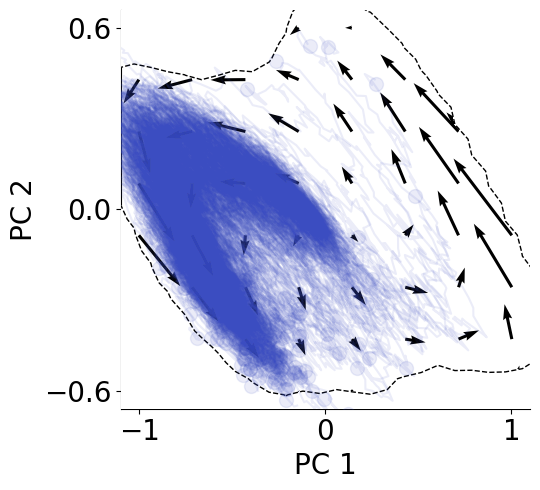

In [6]:
time=100 # time in 10 ms -- total 1s
evidence = -3.5 # evidence strength from [-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5]
flip_horizontally = -1
flip_vertically = 1

cmap = rvb
fig, ax = plt.subplots(figsize=(5.5, 5))

xrange = (
    np.abs(np.quantile(z_pc_[:,:,0].flatten(), 0.01)) + \
    np.abs(np.quantile(z_pc_[:,:,0].flatten(), 0.99))
)/2 # scale the axes so that the latent trajectories lie between -1 and 1 in PC 1 direction

cmap1 = colors.ListedColormap(['white', 'None', 'white'])
cmap2 = colors.ListedColormap(['white'])

z_pc__ = np.reshape(z_pc_[:,:time, :], (-1, 2))
thresh = 50
counts,xbins,ybins = np.histogram2d(
    flip_horizontally * z_pc__[:,0] / xrange, 
    flip_vertically * z_pc__[:,1] / xrange,
    bins=30
)

xx = flip_horizontally * x_/xrange
yy = flip_vertically * y_/xrange
zz = (xbins[0] < xx) * (xx < xbins[-1]) * (ybins[0] < yy) * (yy < ybins[-1])
    
norm = colors.Normalize(vmin=-3.5, vmax=3.5)
time = 100

ax.quiver(
    flip_horizontally * x_/xrange, 
    flip_vertically * y_/xrange, 
    flip_horizontally * u_/xrange, 
    flip_vertically * v_/xrange, 
    angles='xy', color='black', scale_units='xy', scale=10, zorder=150
)

traj = z_pc_[(gammas == evidence), :, :]
for i in range(traj.shape[0]):
    ax.plot(
        flip_horizontally * traj[i, :time, 0]/xrange, 
        flip_vertically * traj[i, :time, 1]/xrange, 
        '-', color=cmap(norm(evidence)), zorder=1100, alpha=0.1
    )
    ax.plot(
        [flip_horizontally * traj[i, time, 0]/xrange], 
        [flip_vertically * traj[i, time, 1]/xrange], 
        'o', markersize=10, color=cmap(norm(evidence)), alpha=0.1, zorder=1100
    )

ax.contourf(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    cmap = cmap1, levels = [-1, thresh, 100000], zorder=1000)

cs = ax.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, linestyles = "dashed", cmap = 'gray', levels = [thresh,100000], zorder=1001)

ax.contourf(
    flip_horizontally * x_/xrange, 
    flip_vertically * y_/xrange, 
    zz.astype(int),
    cmap = cmap2, levels = [0, 0.9], zorder=1000
)     
    
ax.set_ylabel("PC 2", fontsize=20)
ax.set_xlabel("PC 1", fontsize=20)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-0.6, 0, 0.6])
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-0.66, 0.66])
ax.tick_params(axis='both', which='major', labelsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

# Extended Data Figure 4j

Text(0.5, 0, 'PC 1')

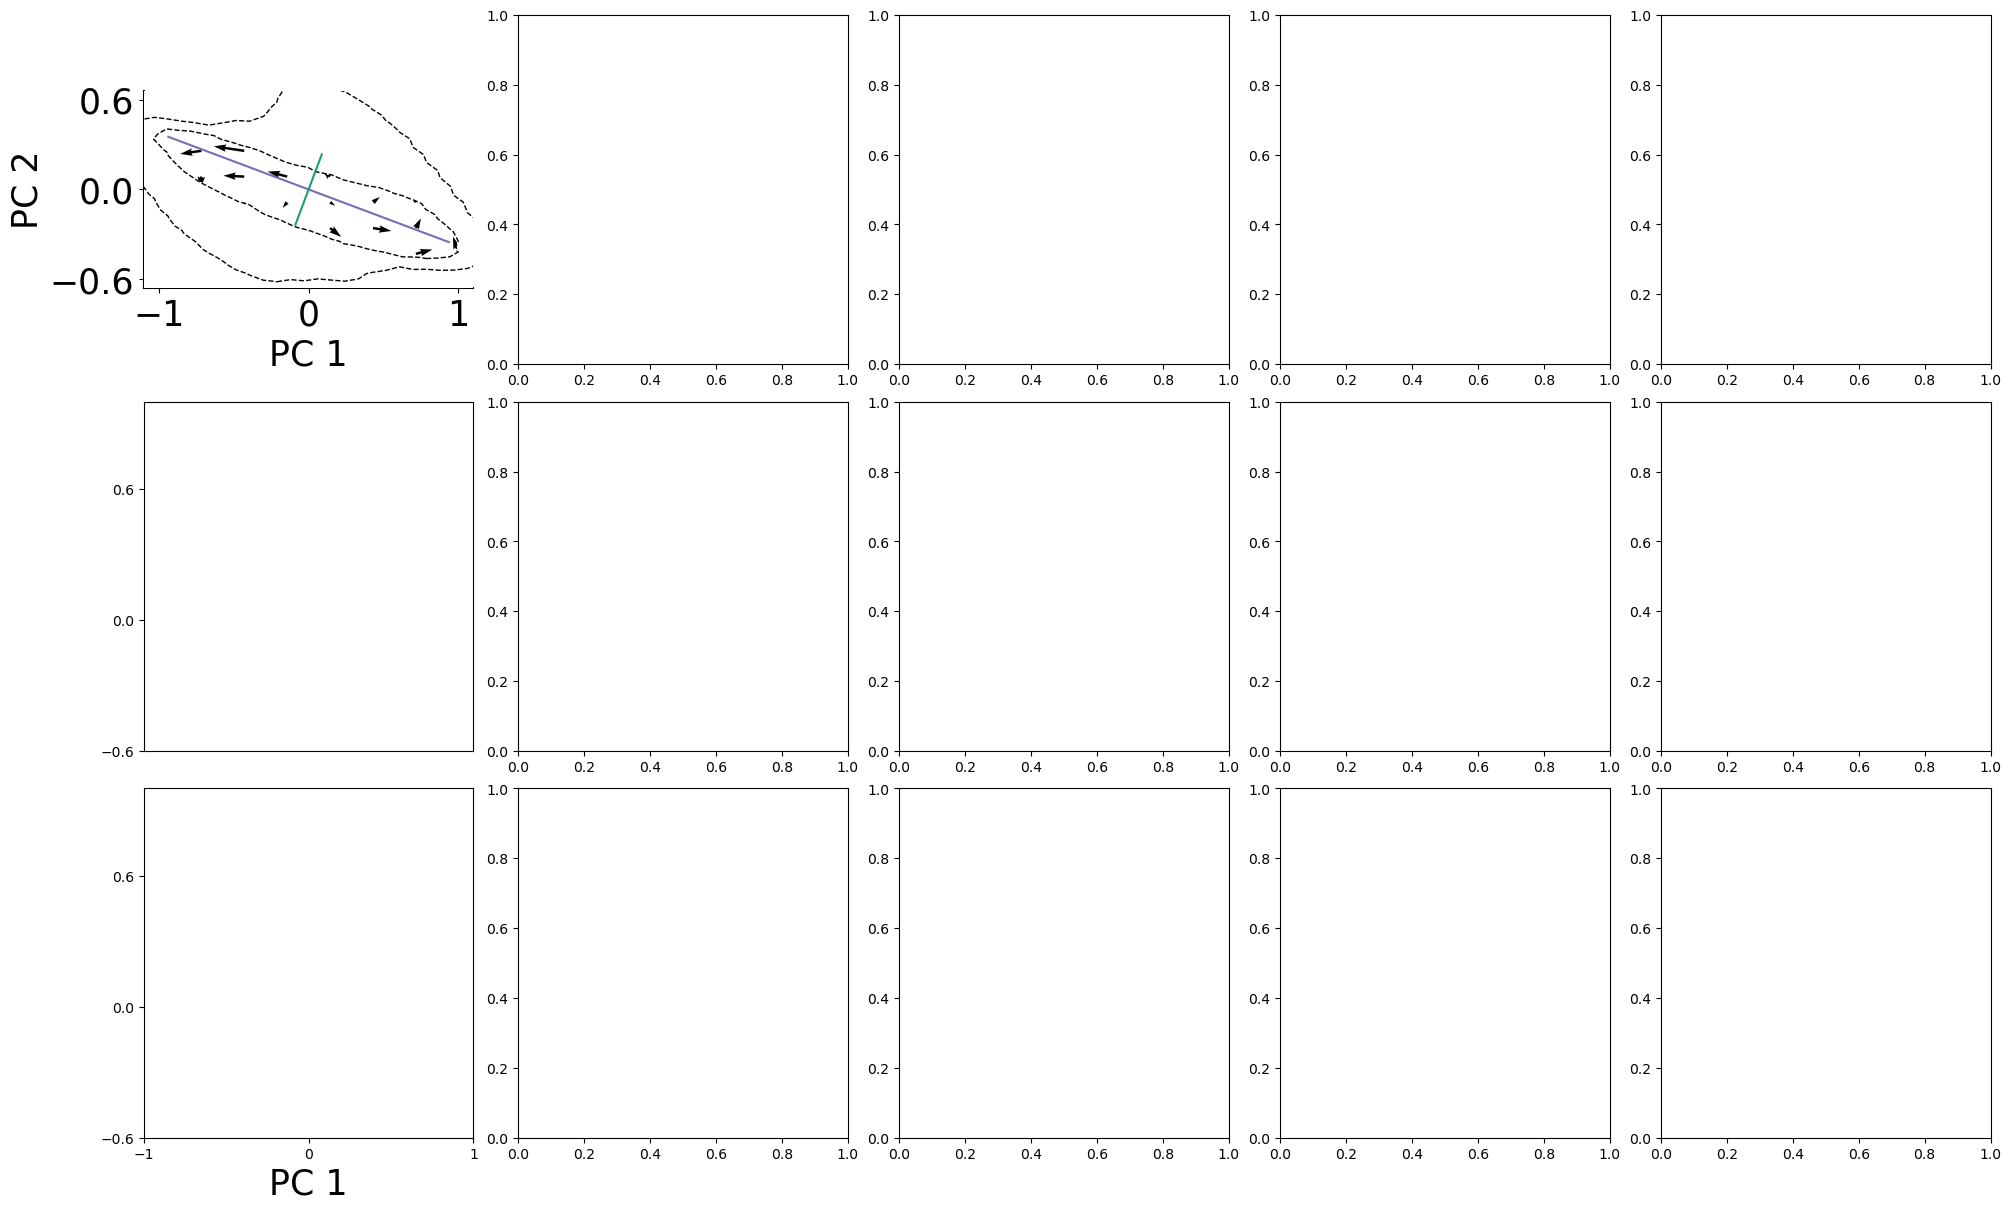

In [7]:
time=33
fig, ax = plt.subplots(3, 5, figsize=(20, 12), constrained_layout=True)
norm = colors.Normalize(vmin=-3.5, vmax=3.5)

ii = 0
pca = PCA(n_components=2)
pca.fit(np.reshape(z_pc_[:,:33,:]/xrange, (-1, 2)))


# Flow field
xrange = (np.abs(np.quantile(z_pc_[:,:,0].flatten(), 0.01)) + np.abs(np.quantile(z_pc_[:,:,0].flatten(), 0.99)))/2
leftevidence = np.mean(z_pc_[(-3.5 == gammas),:,:], axis=0)

if max(leftevidence[:,0], key=abs) > 0:
    flip_horizontally = -1
else:
    flip_horizontally = 1
if max(leftevidence[:,1], key=abs) > 0:
    flip_vertically = -1
else:
    flip_vertically = 1

cmap = rvb
cmap1 = colors.ListedColormap(['white', 'None', 'white'])
cmap2 = colors.ListedColormap(['white'])

z_pc__ = np.reshape(z_pc_[:,:time, :], (-1, 2))
thresh = 50
counts,xbins,ybins = np.histogram2d(
    flip_horizontally * z_pc__[:,0] / xrange, 
    flip_vertically * z_pc__[:,1] / xrange,
    bins=30
)

xx = flip_horizontally * x/xrange
yy = flip_vertically * y/xrange
zz = (xbins[0] < xx) * (xx < xbins[-1]) * (ybins[0] < yy) * (yy < ybins[-1])

input_contrib = gaussian_filter((energy_left*p_lc.T + energy_right*p_rc.T)/2, sigma=2)
recurrent_contrib = energy
energy_diff = recurrent_contrib - input_contrib

firstaxis = pca.components_[0,:]
secondaxis = pca.components_[1,:]

jj = 0
ax[jj, ii].set_aspect('equal', adjustable='box')
ax[jj, ii].plot(
    [0, flip_horizontally * firstaxis[0]], 
    [0, flip_vertically * firstaxis[1]], 
    '-', color=purple, zorder=1200, alpha=1
)

ax[jj, ii].plot(
    [0, -flip_horizontally * firstaxis[0]], 
    [0, -flip_vertically * firstaxis[1]], 
    '-', color=purple, zorder=1200, alpha=1
)

ax[jj, ii].plot(
    [0, 0.25*flip_horizontally * secondaxis[0]], 
    [0, 0.25*flip_vertically * secondaxis[1]], 
    '-', color=mint, zorder=1200, alpha=1
)

ax[jj, ii].plot(
    [0, -0.25*flip_horizontally * secondaxis[0]], 
    [0, -0.25*flip_vertically * secondaxis[1]], 
    '-', color=mint, zorder=1200, alpha=1
)    
    

ax[jj,ii].contourf(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    cmap = cmap1, levels = [-1, thresh, 100000], zorder=1000)

cs = ax[jj,ii].contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, linestyles = "dashed", cmap = 'gray', levels = [thresh,100000], zorder=1001)
    
z_pc__ = np.reshape(z_pc_[:,:100, :], (-1, 2))
thresh = 50
counts,xbins,ybins = np.histogram2d(
    flip_horizontally * z_pc__[:,0] / xrange, 
    flip_vertically * z_pc__[:,1] / xrange,
    bins=30
)

cs = ax[jj,ii].contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, linestyles = "dashed", cmap = 'gray', levels = [thresh,100000], zorder=1001)

ax[jj,ii].contourf(
    flip_horizontally * x/xrange, 
    flip_vertically * y/xrange, 
    zz.astype(int),
    cmap = cmap2, levels = [0, 0.9], zorder=1000
)

ax[jj,ii].spines['top'].set_visible(False)
ax[jj,ii].spines['right'].set_visible(False)
ax[jj,ii].spines['left'].set_linewidth(1.5)
ax[jj,ii].spines['bottom'].set_linewidth(1.5)
ax[jj,ii].tick_params(axis='both', which='major', labelsize=25)
ax[jj,ii].set_xlim([-1.1, 1.1])
ax[jj,ii].set_ylim([-0.66, 0.66])

ax[0,ii].quiver(
    flip_horizontally * x_/xrange, 
    flip_vertically * y_/xrange, 
    flip_horizontally * u_/xrange, 
    flip_vertically * v_/xrange, 
    angles='xy', color='black', scale_units='xy', scale=10, zorder=150
)

ax[0,ii].set_xticks([-1, 0, 1])
ax[1,ii].set_xticks([])
ax[0,ii].set_xlabel("PC 1", fontsize=25)
ax[0,ii].set_yticks([-0.6, 0, 0.6])
ax[1,ii].set_yticks([-0.6, 0, 0.6])
ax[2,ii].set_yticks([-0.6, 0, 0.6])
ax[0,ii].set_ylabel("PC 2", fontsize=25)
ax[2,ii].set_xticks([-1, 0, 1])
ax[2,ii].set_xlabel("PC 1", fontsize=25)

# Extended Data Figure 4l

In [8]:
trainingN = 4000
pca = PCA(n_components=2)
pca.fit(np.reshape(z_pc_[:,:33,:]/xrange, (-1, 2)))
z_pc_pc_ = np.reshape(pca.transform(np.reshape(z_pc_[:,:100,:]/xrange, (-1, 2))), (5000, -1, 2))
choices = z_pc_pc_[:,-1,1] > 0

In [9]:
from scipy.stats import binomtest
from sklearn.linear_model import LogisticRegression

scores = []
scores_low_ci = []
scores_high_ci = []
for time in range(100):
    clf = LogisticRegression(random_state=0).fit(z_pc_pc_[:trainingN, time, 1:], choices[:trainingN])
    scores.append(clf.score(z_pc_pc_[trainingN:, time, 1:], choices[trainingN:]))
    result = binomtest(
        k=np.sum(clf.predict(z_pc_pc_[trainingN:, time, 1:]) == choices[trainingN:]), 
        n=choices[trainingN:].shape[0], 
        p=0.99
    )
    scores_low_ci.append(result.proportion_ci().low)
    scores_high_ci.append(result.proportion_ci().high)

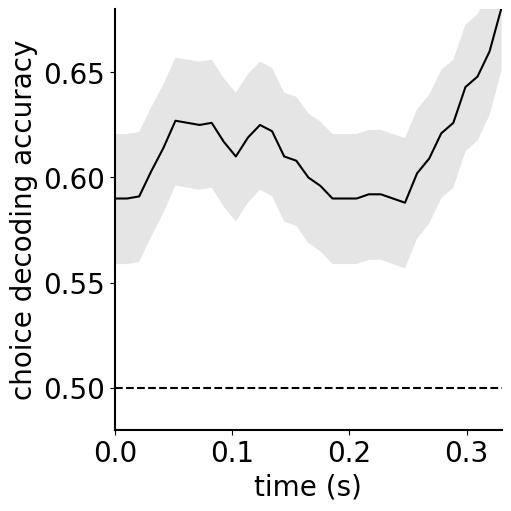

In [10]:
fig, ax = plt.subplots(figsize=(5, 5), constrained_layout=True)
x = np.linspace(0, 0.33, 33)
ax.plot(x, scores[:33], color='k')

ax.fill_between(
    x, 
    scores_low_ci[:33], 
    scores_high_ci[:33], 
    facecolor='gray', 
    alpha=0.2
)

ax.set_ylim([0.48, 0.68])
ax.set_xlim([0, 0.33])
plt.axhline(y=.5, color='k', linestyle='--')
ax.set_ylabel("choice decoding accuracy", fontsize=20)
ax.set_xlabel("time (s)", fontsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=20)

# Extended Data Figure 4k

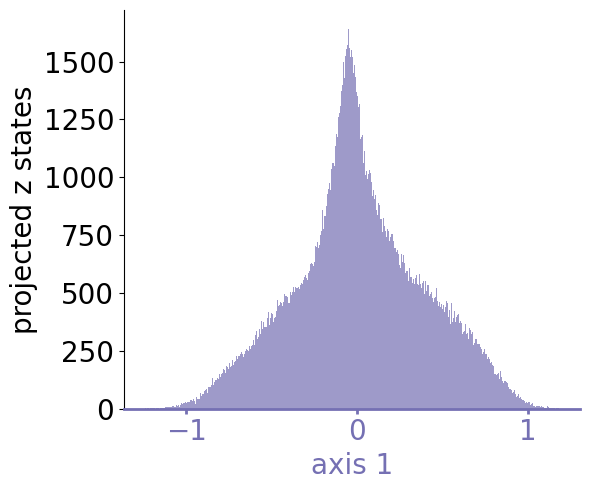

In [11]:
z_pc1 = np.sum(z_pc_[:,:33,:]/xrange * np.array(firstaxis), axis=-1).flatten()

fig, ax = plt.subplots(figsize=(6, 5))
ax.hist(
    flip_horizontally*z_pc1, 
    bins=int(np.sqrt(z_pc1.shape[0])),
    color=purple,
    alpha=0.7
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("projected z states", fontsize=20)
ax.set_xlabel("axis 1", color=purple, fontsize=20)
ax.spines['bottom'].set_color(purple)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors=purple)
ax.set_xticks([-1, 0, 1])
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', width=2) 
fig.tight_layout()

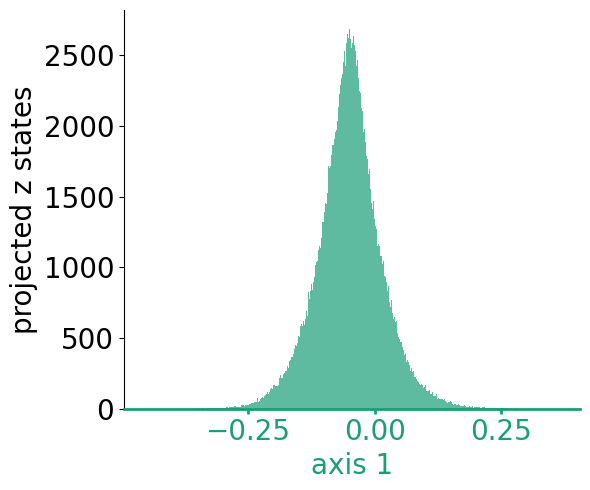

In [12]:
z_pc2 = np.sum(z_pc_[:,:33,:]/xrange * np.array(secondaxis), axis=-1).flatten()

fig, ax = plt.subplots(figsize=(6, 5))
ax.hist(
    flip_vertically*z_pc2, 
    bins=int(np.sqrt(z_pc2.shape[0])),
    color=mint,
    alpha=0.7
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("projected z states", fontsize=20)
ax.set_xlabel("axis 1", color=mint, fontsize=20)
ax.spines['bottom'].set_color(mint)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors=mint)
ax.set_xticks([-0.25, 0, 0.25])
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', width=2) 
fig.tight_layout()